In [19]:
import pandas as pd
import seaborn as sns
import random
import math
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
from scipy.signal import savgol_filter
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', size=16)
sns.set_style('white')
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
%matplotlib inline

In [3]:
datasets = pd.read_csv("Datasets.csv")

In [4]:
datasets.head()

,x,y,label
0,2.032476,2.087660,0
1,1.588659,2.323557,0
2,2.774236,1.806709,0
3,2.159829,2.709531,0
4,0.857455,1.933794,0


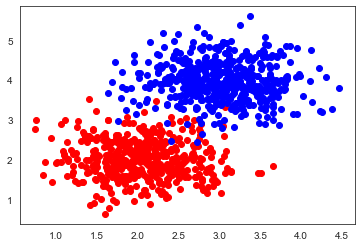

In [7]:
plt.figure()

for i in range(len(datasets['label'])):
    if datasets['label'].iloc[i] == 0:
        plt.plot(datasets['x'].iloc[i], datasets['y'].iloc[i], "ro")
    else:
        plt.plot(datasets['x'].iloc[i], datasets['y'].iloc[i], "bo")

plt.show()

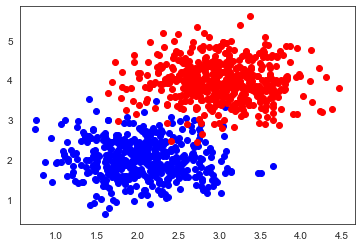

In [8]:
plt.figure()

for i in range(len(datasets['label'])):
    if datasets['label'].iloc[i] == 1:
        plt.plot(datasets['x'].iloc[i], datasets['y'].iloc[i], "ro")
    else:
        plt.plot(datasets['x'].iloc[i], datasets['y'].iloc[i], "bo")
        
plt.show()

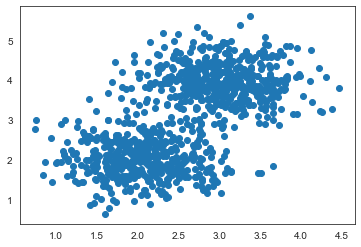

In [12]:
plt.figure()
plt.scatter(datasets['x'], datasets['y'])
plt.show()

In [13]:
X1 = datasets["x"].values.tolist()
X2 = datasets["y"].values.tolist()
Y = datasets["label"].values.tolist()

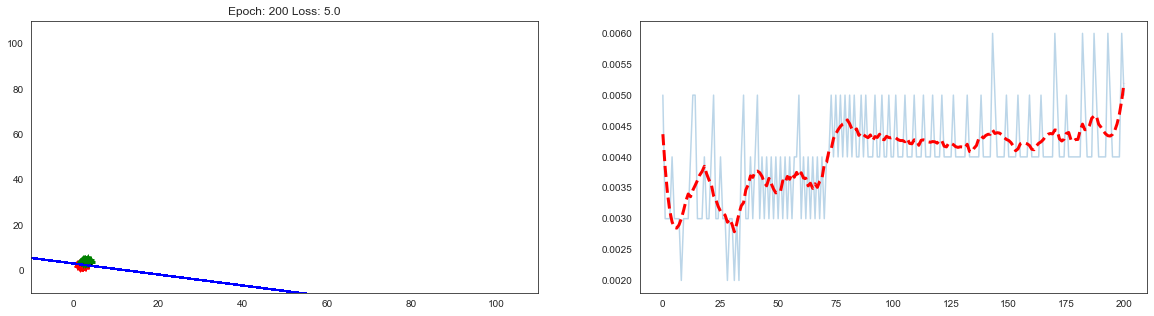

Epoch: 200 Loss: 0.005
207


In [21]:
W = [random.random(), random.random()]
b = random.random()

# W = [random.uniform(-1,1), random.uniform(-1,1)]
# b = random.uniform(-1,1)

lr = 0.1
theta=0.5

epoch = 0
count = 0


loss = []

while epoch <= 200:
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count += 1
    
    loss.append(1/len(X1)*total_error)
    
    plt.figure(figsize=(20,5))
    #loss.append([epoch, total_error])   
    display.clear_output(wait=True)
    plt.subplot(1,2,1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "r+")
        else:
            plt.plot(X1[i], X2[i], "g+")

        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr=(theta-b)/W[0]
        yintr=(theta-b)/W[1]

        slope = -yintr/xintr
        xx = plt.xlim()
#                 print(xx)
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx,yeq, 'b-')

    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1,2,2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3) # window size 51, polynomial order 3
        plt.plot(yhat, 'r--', lw=3)

    plt.show()
            
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1
    
    print(count)

